
# Boop boop

In [1]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt

import utils
import models

In [2]:
from parse_data import articles_list

In [67]:
encoding = utils.get_encoding(articles_list)
char2int, int2char = encoding

with open('models/encoding', 'wb') as f:
    pickle.dump(encoding, f)

In [85]:
%matplotlib notebook
def live_plot(generator, size, fig=None):
    plt.ion()
    
    if fig is None: fig = plt.figure()
    fig.show()
    fig.canvas.draw()
    ax = fig.gca()
    losses = np.zeros(size)
    
    try:
        for i, loss in enumerate(generator):
            losses[i] = loss
            ax.clear()
            ax.plot(losses[:i], 'b')
            fig.canvas.draw()
    except KeyboardInterrupt:
        pass
    
    plt.ioff()
    return losses

In [69]:
sizes = [
    (100, 2),
    (100, 4),
    (200, 2),
    (400, 2),
    (400, 3),
    (400, 4)
]

labels = [ f'{h}x{d}' for h, d in sizes ]

rnns = [ models.RNNModule(len(char2int), h, d) for h, d in sizes ]

lstms = [ models.LSTMModule(len(char2int), h, d) for h, d in sizes ]


## Plain RNNs


Training rnn labled 100x2


<IPython.core.display.Javascript object>


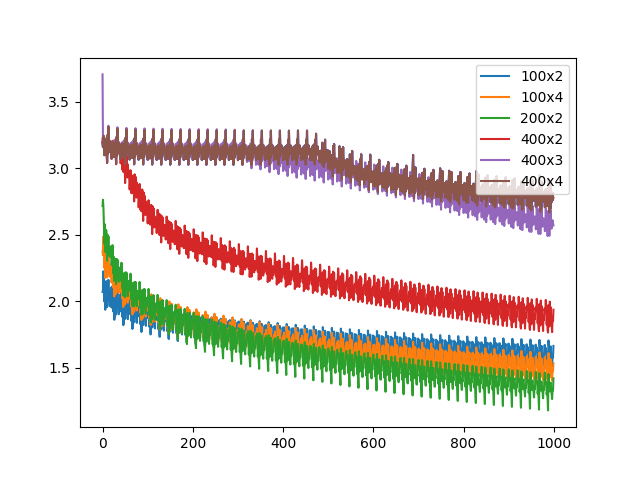

Epoch 49, Article 19. Last 10 mean time: 0.40s backward pass........
Training rnn labled 100x4
Epoch 49, Article 19. Last 10 mean time: 0.62s backward pass........
Training rnn labled 200x2
Epoch 49, Article 19. Last 10 mean time: 0.33s backward pass........
Training rnn labled 400x2
Epoch 49, Article 19. Last 10 mean time: 0.33s backward pass........
Training rnn labled 400x3
Epoch 49, Article 19. Last 10 mean time: 0.44s backward pass........
Training rnn labled 400x4


In [89]:
articles = 20
epochs = 50
batch_size = 250

fig = plt.figure()
rnn_losses = []
for model, label in zip(rnns, labels):
    print('\nTraining rnn labled', label)
    loss = live_plot(
        models.train(model,
                     articles_list[:articles],
                     encoding,
                     epochs=epochs,
                     batch_size=batch_size),
        articles*epochs,
        fig
    )
    rnn_losses.append(loss)
    torch.save(model.state_dict(), f'models/rnn_{label}')

In [96]:
with open('models/rnn_losses', 'wb') as f: pickle.dump(rnn_losses, f)

In [90]:
plt.ioff()
for loss, label in zip(rnn_losses, labels):
    plt.plot(loss, label=label)
plt.legend()
plt.show()

In [100]:
for model, label in zip(rnns, labels):
    print(f'\n\nText from RNN {label}:\n\n')
    print(models.predict(model, encoding, "The", 500))



Text from RNN 100x2:


The ''Bmosk in emither this sires. The African bencifitubet dough an the befthough tures dains, camet==
Espivinubley. The consen pare popot at is gruafter==

==
The mufroniablef, ghich' Alaccenslend which ge brequisen, ableraly poted the verwininas, and as dack mont-reter put thisctiam an its dribl as lirerast planed breast eneratated a han dees" in docy or fto4g. Wost flica. 'It relioded sfors blownico saction from they longe, and sticks Cuther dighe wood, abe shoog. breeded habiaby south Africall


Text from RNN 100x4:


The ''Femmont was not as astivist 14fictman opfillias Iflenvidia and of Of burly harr& Naving ves large. The females reveral areat in the adancy blik strophers habits==
The toing to cligution stony on the karred with ttass and hick and beuut concertes or stocker, lastish Africa, and smallows crimisias. Hares, rome this beo-nefegiler with denagions, tord busfuling ant. In pershronde' foud-shulutel mluinds had oh zurutals dooby. Duostlisting re

## LSTMs


Training lstm labled 100x2


<IPython.core.display.Javascript object>


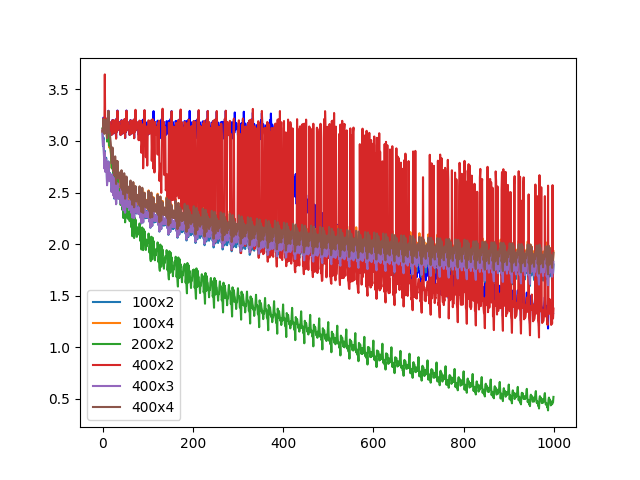

Epoch 49, Article 19. Last 10 mean time: 0.49s backward pass........
Training lstm labled 100x4
Epoch 49, Article 19. Last 10 mean time: 0.76s backward pass........
Training lstm labled 200x2
Epoch 49, Article 19. Last 10 mean time: 0.43s backward pass........
Training lstm labled 400x2
Epoch 49, Article 19. Last 10 mean time: 0.59s backward pass........
Training lstm labled 400x3
Epoch 49, Article 19. Last 10 mean time: 0.79s backward pass........
Training lstm labled 400x4


In [91]:
articles = 20
epochs = 50
batch_size = 100

fig = plt.figure()
lstm_losses = []
for model, label in zip(lstms, labels):
    print('\nTraining lstm labled', label)
    loss = live_plot(
        models.train(model,
                     articles_list[:articles],
                     encoding,
                     epochs=epochs,
                     batch_size=batch_size),
        articles*epochs,
        fig
    )
    lstm_losses.append(loss)
    torch.save(model.state_dict(), f'models/lstm_{label}')

In [95]:
with open('models/lstm_losses', 'wb') as f: pickle.dump(lstm_losses, f)

In [92]:
plt.ioff()
for loss, label in zip(lstm_losses, labels):
    plt.plot(loss, label=label)
plt.legend()
plt.show()

In [102]:
for model, label in zip(lstms, labels):
    print(f'\n\nText from LSTM {label}\n\n')
    print(models.predict(model, encoding, "The", 500))



Text from LSTM 100x2


The Atseas a dendt fowdered pucalitaty. Motembints rethel it a bardt in the pecaring poralition thape ctarve soughandsimaniol whoten cornass that spens in flmafh on the beets in AUPstar, which stail carsore in thes oftend that lat hard feighted, and 1'3x, Encaetion thie sodeisle which a remangs, sfould ivirad buind prod sortes, a, bulsinilon klapis fubrly bearlien colben confiped al is Majerntiwaia.

The biliman colitent.
=
===xaxred bedecis'' (anns, cafietk= It deimanger, broundlvern cance ninchuc


Text from LSTM 100x4


The '''Hrfalile, sooder''se im corelry hoyds wand 1ust. Wivh birl of afeam dink a3bozite of the torumes, unluys of and wing is coagh and the mhen unces spifedy ecalilan'w fremforant for domest. 
=
Depcoriitentan =
Indicumalurk to ofe blastanps.

I
saves, wliteao the most ay its was, and crlocors of ney ane ones fark euma is a live the bheer, reedaraces a nourd eatile Isdecied on undeud, in teratires pric-a boudt.

==Top. The boacite baxh of s